In [3]:
import pandas as pd

In [4]:
lungs_data=pd.read_csv(r"lung_cancer_examples.csv")

In [5]:
lungs_data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [6]:
import matplotlib.pyplot as plt

In [7]:
lungs_data.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [8]:
lungs_data.shape

(59, 7)

In [9]:
x=lungs_data[['Age','Smokes','AreaQ','Alkhol']]
y=lungs_data['Result']
x.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.linear_model import LogisticRegression
model_regression=LogisticRegression()

In [12]:
from sklearn.ensemble import RandomForestClassifier
model_random=RandomForestClassifier(n_estimators=100,random_state=42)

In [13]:
from sklearn.tree import DecisionTreeClassifier
model_decision=DecisionTreeClassifier(criterion="entropy",max_depth=10,random_state=42)

In [14]:
from sklearn.naive_bayes import GaussianNB
model_gauss=GaussianNB()

In [15]:
from sklearn.naive_bayes import MultinomialNB
model_multi= MultinomialNB()

In [16]:
from sklearn.naive_bayes import BernoulliNB
model_bourn=BernoulliNB()

In [17]:
import seaborn as sns

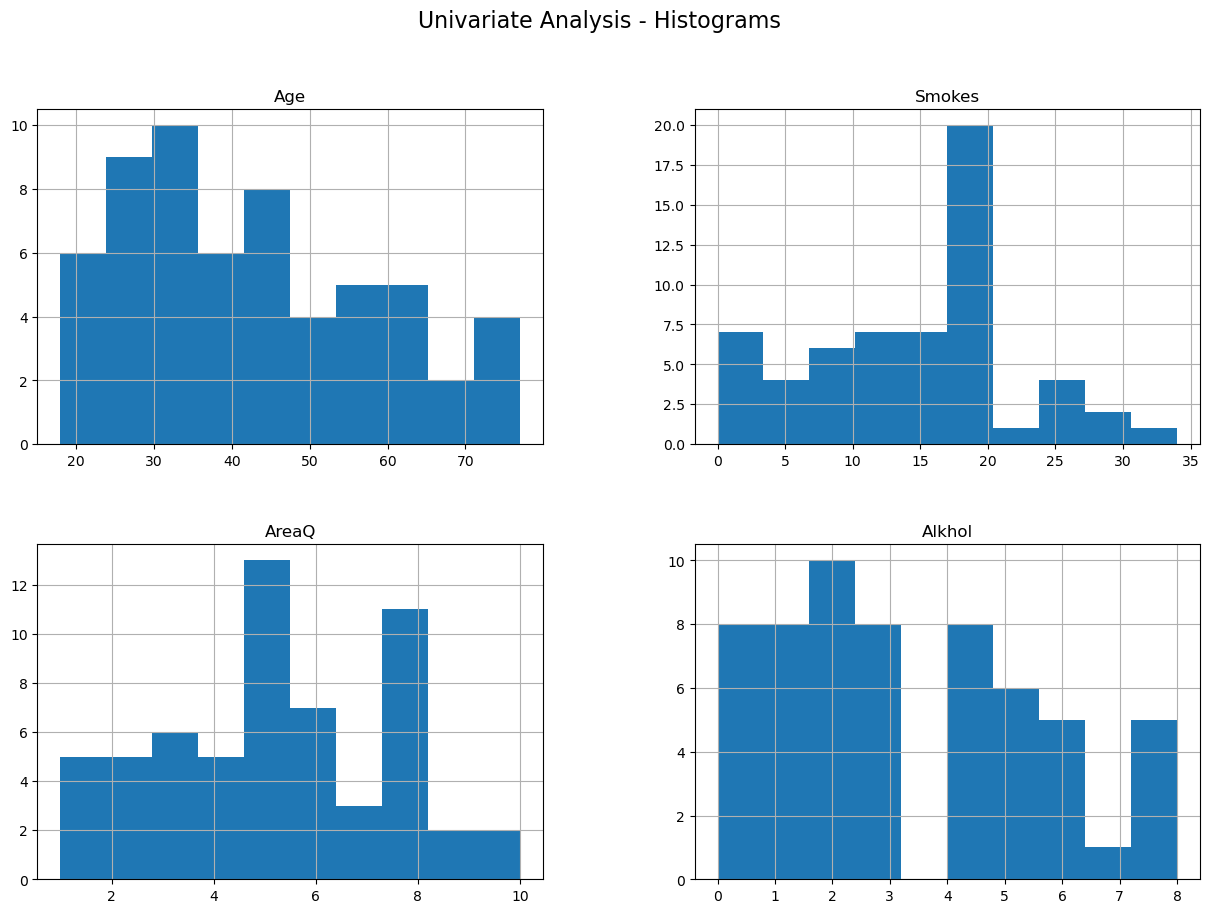

In [18]:
# Univariate Analysis: Histograms for all numeric columns
x.hist(bins=10, figsize=(15, 10))
plt.suptitle('Univariate Analysis - Histograms', fontsize=16)
plt.show()

C:\Users\Anshu kanukula\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


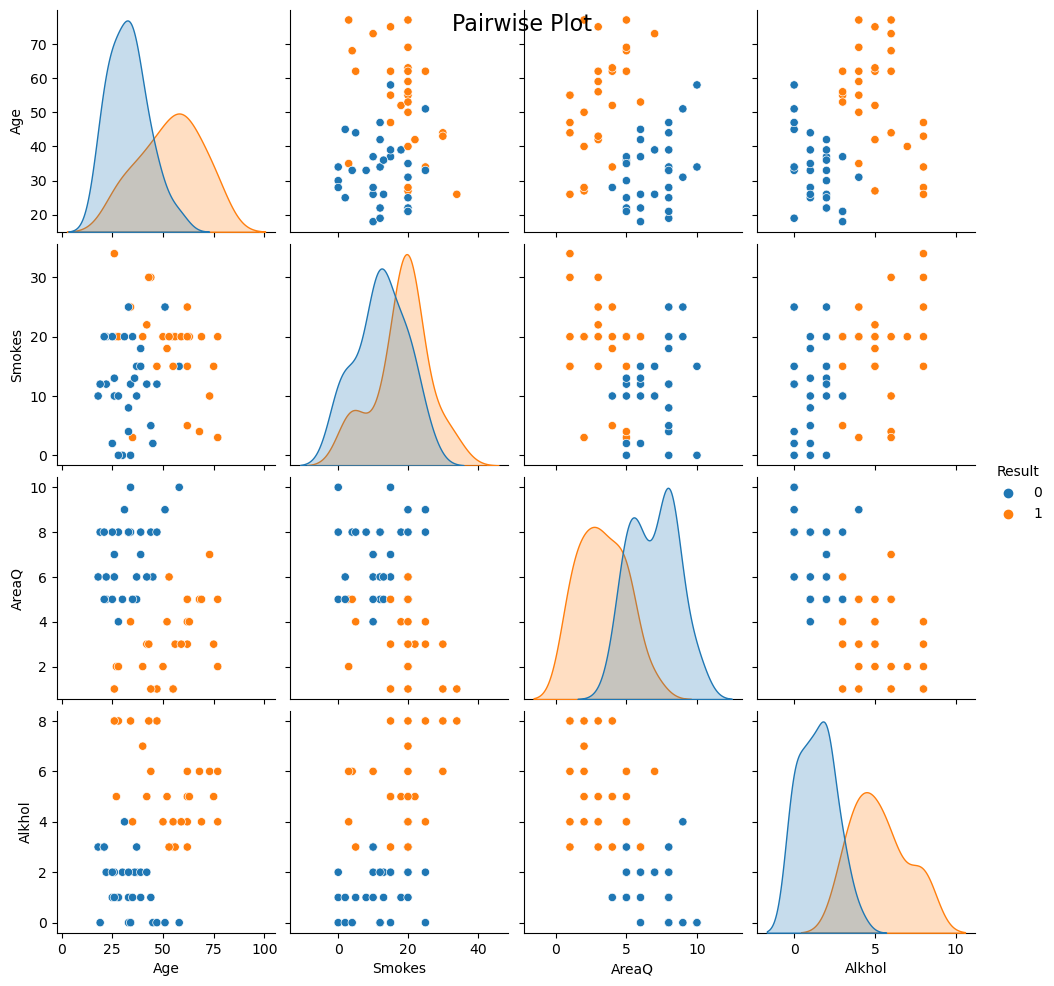

In [19]:
# Pairwise Plot
sns.pairplot(lungs_data, hue='Result', height=2.5)
plt.suptitle('Pairwise Plot', fontsize=16)
plt.show()

C:\Users\Anshu kanukula\AppData\Local\Temp\ipykernel_2812\1271894555.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Age', y='Smokes', data=x, jitter=True, palette='Set1')


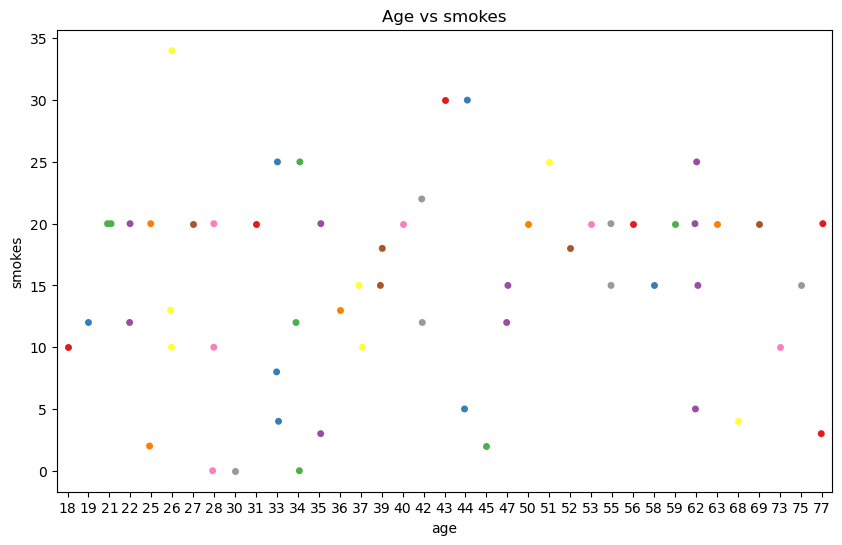

In [20]:
plt.figure(figsize=(10, 6))
sns.stripplot(x='Age', y='Smokes', data=x, jitter=True, palette='Set1')
plt.title('Age vs smokes')
plt.xlabel('age')
plt.ylabel('smokes')
plt.show()

In [21]:
# Correlation Matrix
corr_matrix = x.corr()
corr_matrix

,Age,Smokes,AreaQ,Alkhol
Age,1.000000,0.053665,-0.268957,0.318621
Smokes,0.053665,1.000000,-0.353295,0.469915
AreaQ,-0.268957,-0.353295,1.000000,-0.714412
Alkhol,0.318621,0.469915,-0.714412,1.000000


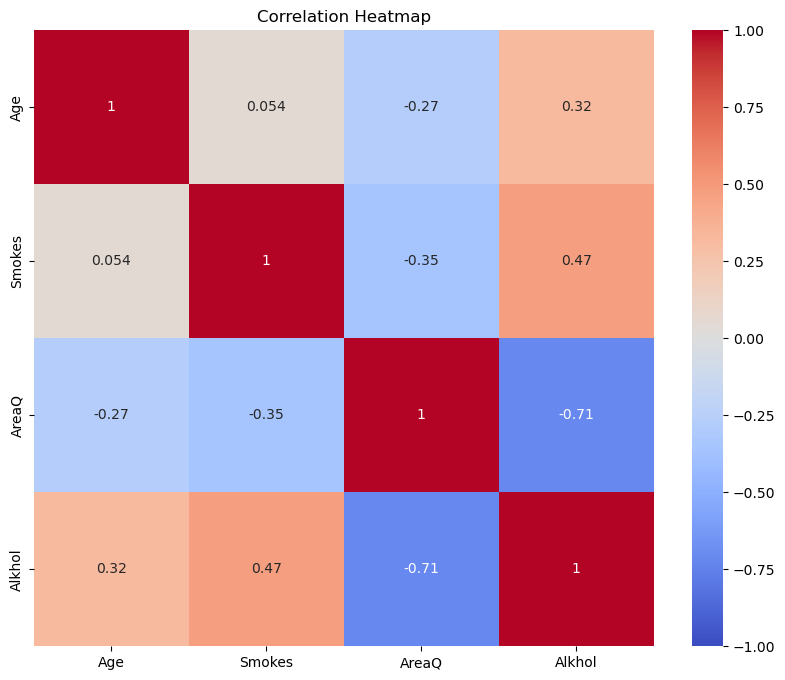

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [23]:
from sklearn.metrics import accuracy_score,precision_score
def applyalgorithm(x_train,y_train,x_test,y_test):
    model_regression=LogisticRegression()
    model_regression.fit(x_train,y_train)
    y_pred=model_regression.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    print("logistic regression:",accuracy,precision)
    
    model_random=RandomForestClassifier(n_estimators=100,random_state=42)
    model_random.fit(x_train,y_train)
    y_pred=model_random.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    print("Random Forest Classifier:",accuracy,precision)
    
    model_decision=DecisionTreeClassifier(criterion="entropy",max_depth=10,random_state=42)
    model_decision.fit(x_train,y_train)
    y_pred=model_decision.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    print("Decision Tree Classifier:",accuracy,precision)
    
    model_gauss=GaussianNB()
    model_gauss.fit(x_train,y_train)
    y_pred=model_gauss.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    print("GaussianNB:",accuracy,precision)
    
    model_multi= MultinomialNB()
    model_multi.fit(x_train,y_train)
    y_pred=model_multi.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    print("MultinomialNB:",accuracy,precision)
    
    model_bourn=BernoulliNB()
    model_bourn.fit(x_train,y_train)
    y_pred=model_bourn.predict(x_test)
    accuracy=accuracy_score(y_pred,y_test)
    precision=precision_score(y_pred,y_test)
    print("BernoulliNB",accuracy,precision)

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [25]:
print("accuracy score using all the supervised learning algorithms:")
applyalgorithm(x_train,y_train,x_test,y_test)

accuracy score using all the supervised learning algorithms:
logistic regression: 0.9444444444444444 0.8571428571428571
Random Forest Classifier: 0.9444444444444444 0.8571428571428571
Decision Tree Classifier: 0.9444444444444444 0.8571428571428571
GaussianNB: 0.9444444444444444 0.8571428571428571
MultinomialNB: 1.0 1.0
BernoulliNB 0.6666666666666666 1.0


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [27]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [28]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbc,
    'xgb':xgb
    
}

In [29]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import accuracy_score, precision_score

In [30]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [31]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.3888888888888889
Precision -  0.3888888888888889
For  KN
Accuracy -  0.8333333333333334
Precision -  0.8333333333333334
For  NB
Accuracy -  1.0
Precision -  1.0
For  DT
Accuracy -  0.9444444444444444
Precision -  1.0
For  LR
Accuracy -  0.9444444444444444
Precision -  1.0
For  RF
Accuracy -  1.0
Precision -  1.0
For  AdaBoost
Accuracy -  0.8333333333333334
Precision -  0.75
For  BgC
Accuracy -  1.0
Precision -  1.0
For  ETC
Accuracy -  0.9444444444444444
Precision -  1.0
For  GBDT
Accuracy -  0.9444444444444444
Precision -  1.0
For  xgb
Accuracy -  0.9444444444444444
Precision -  1.0


In [32]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [33]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.388889,0.388889
1,KN,0.833333,0.833333
2,NB,1.000000,1.000000
3,DT,0.944444,1.000000
4,LR,0.944444,1.000000
5,RF,1.000000,1.000000
6,AdaBoost,0.833333,0.750000
7,BgC,1.000000,1.000000
8,ETC,0.944444,1.000000
9,GBDT,0.944444,1.000000


In [34]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.388889
1,KN,Accuracy,0.833333
2,NB,Accuracy,1.000000
3,DT,Accuracy,0.944444
4,LR,Accuracy,0.944444
5,RF,Accuracy,1.000000
6,AdaBoost,Accuracy,0.833333
7,BgC,Accuracy,1.000000
8,ETC,Accuracy,0.944444
9,GBDT,Accuracy,0.944444


C:\Users\Anshu kanukula\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


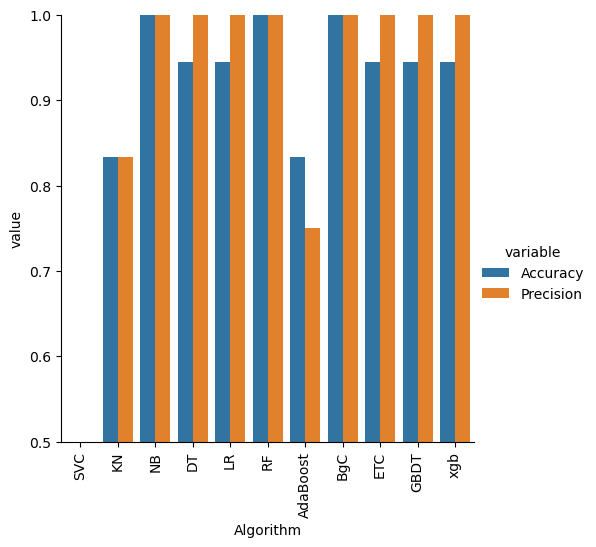

In [35]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()